In [1]:
pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.1 MB/s eta 0:00:00


In [2]:
pip install git+https://github.com/huggingface/peft.git

  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-pg085q0s
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-pg085q0s
  Resolved https://github.com/huggingface/peft.git to commit b180ae46f8cf9663f3bf786b41b2eb41c2512031
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peft: filename=peft-0.12.1.dev0-py3-none-any.whl size=316782 sha256=3989c7321b8da0706cbff380589347ba26e7d75242ddb90be47598774c673bf7
  Stored in directory: /tmp/pip-ephem-wheel-cache-hg5jk2sv/wheels/d7/c7/de/1368fac8590e1b103ddc2ec2a28ad51d83aded1a3830e8a087
Successfully built peft


In [3]:
import time
import os
import torch
from PIL import Image
from diffusers import StableDiffusionXLPipeline
# from diffusers import StableCascadeDecoderPipeline, StableCascadePriorPipeline
from diffusers.utils import load_image, make_image_grid

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
pipe = StableDiffusionXLPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
pipe.load_lora_weights('artificialguybr/bettertextredmond', weight_name = 'BetterTextRedmond.safetensors', adapter_name= "Text-Inclusion")
pipe.set_adapters(["Text-Inclusion"], adapter_weights=[1.0])

BetterTextRedmond.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

In [6]:
pipe.load_lora_weights('artificialguybr/LogoRedmond-LogoLoraForSDXL-V2', weight_name = 'LogoRedmondV2-Logo-LogoRedmAF.safetensors', adapter_name= "logo_design")
pipe.set_adapters(["logo_design"], adapter_weights=[1.0])

(…)ogoRedmondV2-Logo-LogoRedmAF.safetensors:   0%|          | 0.00/171M [00:00<?, ?B/s]

  0%|          | 0/30 [00:00<?, ?it/s]

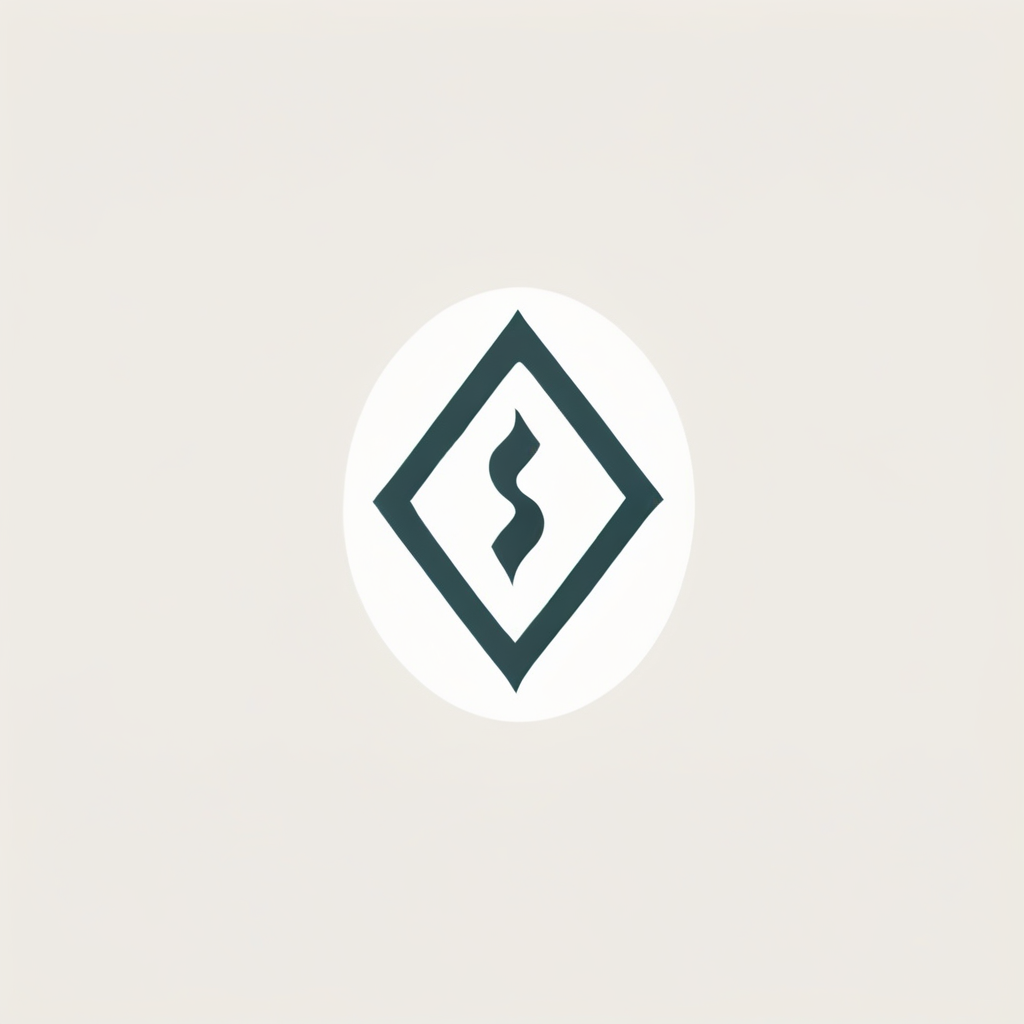

In [7]:
prompt = "minimalist logo for Scriptyl,a screenwriting software."
negative_prompt = "realistic, photography, text"
width = 1024
height = 1024
num_inference_steps = 30
guidance_scale = 10
image = pipe(prompt, negative_prompt=negative_prompt, width=width, height=height, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps).images[0]
image.save('result.png')
image